In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#file names
file1 = 'Median Rent Price per sq ft 1 Bedrm.csv'
file2 = 'Median Rent Price per sq ft 2 Bedrm.csv'
file3 = 'Median Rent Price per sq ft 3 Bedrm.csv'
file4 = 'Median Rent Price per sq ft Condo.csv'

def setup(fname):
    '''
    takes .csv file name and reads it as a dataframe
    then sorts columns by Zip Code and replaces NaN
    values with 0
    
    :param fname: file name
    :type fname: str ending with '.csv'
    '''
    
    #assert isinstance(fname,basestring)
    assert fname[-4:]=='.csv'
    
    df=pd.read_csv(fname)
    df=df.sort_values('RegionName')
    df=df.drop(['City', 'State', 'Metro', 'SizeRank', 'CountyName'],axis=1)
    return df

#pass each file through function to produce four dataframes
df1=setup(file1)
df2=setup(file2)
df3=setup(file3)
df4=setup(file4)

def commonzips(dflist):
    '''
    finds the common zip codes with data specified in all 
    the dataframes contained in a list given as an input
    
    :param:  dflist
    :type: list of dataframes
    '''
    
    assert isinstance(dflist, list)
    assert len(dflist) > 1
    
    ziplist=list(set(dflist[0].RegionName))
    for i in range(len(dflist)):
        assert isinstance(dflist[i],pd.DataFrame)
        ziplist=list(set(ziplist) & set(dflist[i].RegionName))
    ziplist.sort()
    return ziplist

#make list of four dataframes and pass it to function
dflist=[df1,df2,df3,df4]
zips=commonzips(dflist)

def moresetup(df, zips):
    '''
    reducing dataframe rows to only include the ones
    whose zip codes are found in zips and also getting
    rid of columns that contain only NaN values
    
    :param:  df
    :type: dataframe
    :param: zips
    :type: list of integer 5-digit zip codes
    '''
    
    assert isinstance(df, pd.DataFrame) and isinstance(zips, list)
    for i in zips:
        assert 10000<=i<=99999
        
    df=df[df.RegionName.isin(zips)]
    df=df.dropna(axis=1, how='all')
    return df

#update each dataframe using this most recent function
df1=moresetup(df1,zips)
df2=moresetup(df2,zips)
df3=moresetup(df3,zips)
df4=moresetup(df4,zips)

Here we are going to figure out the influence of two factors on the housing rent price in La Jolla university area(zipcode 92122) : the type of apartment and the month when someone starts his rent. The data we obtained contains 4 types of apartment: 1 bedroom, 2 bedrooms, 3 bedrooms and condo. However, we can only find the data for all four types of apartment from 2017-01 to 2017-12. So we decide to analyze only the rent prices for year 2017.

We hope that the result can offer some guideline for UCSD students on when and which type of apartment is the cheapest for leasing.

In [17]:
index = ['RegionName','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06',
         '2017-07','2017-08','2017-09','2017-10','2017-11','2017-12']
br1 = df1.loc[:, index]
br2 = df2.loc[:, index]
br3 = df3.loc[:, index]
condo = df4.loc[:, index]
    

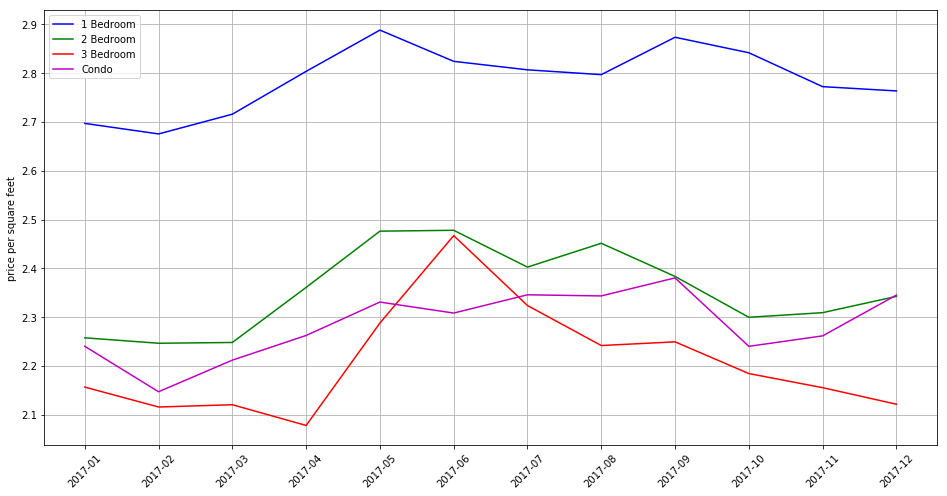

In [21]:
data1 = br1.iloc[2,1:].tolist()
data2 = br2.iloc[2,1:].tolist()
data3 = br3.iloc[2,1:].tolist()
data4 = condo.iloc[2,1:].tolist()
months=list(br1)[1:]

fig = plt.figure(figsize=(16,8)) 

line1, = plt.plot(months, data1,color = 'b',label = '1 Bedroom')
line2, = plt.plot(months, data2,color = 'g',label = '2 Bedroom')
line2, = plt.plot(months, data3,color = 'r',label = '3 Bedroom')
line2, = plt.plot(months, data4,color = 'm',label = 'Condo')
plt.legend(loc = 'upper left')

plt.grid(True)
plt.xticks(rotation=45)
legend(loc='upper left')
plt.ylabel(u'price per square feet')

plt.show()